In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from statsmodels.tsa.ar_model import AR

In [2]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date
start, end = len(df), len(df) + 21

In [3]:
active_ts = df.active
model = AR(active_ts, freq="D").fit(ic="aic", trend="nc")
pactive_ts = active_ts.append(model.predict(start, end))

In [4]:
pred_df = pd.DataFrame({"active_increments": pactive_ts, "active_cumulative": pactive_ts.cumsum()})

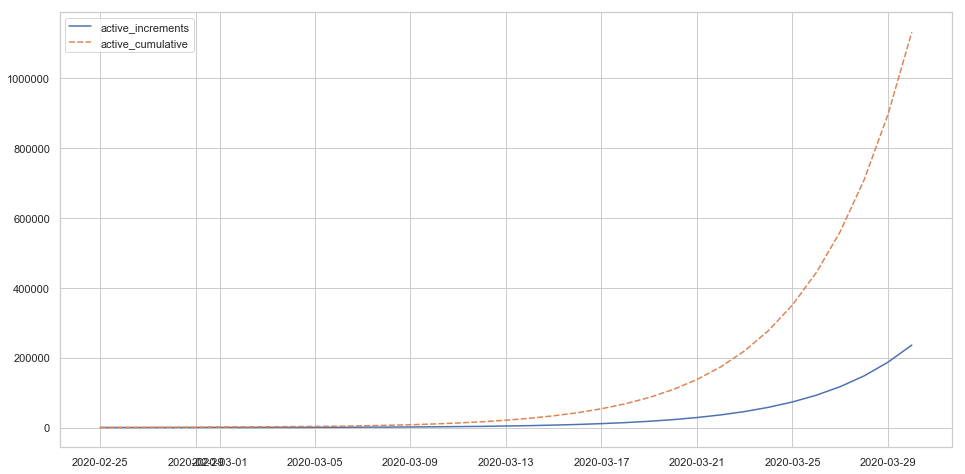

In [5]:
sns.set(style="whitegrid", rc={'figure.figsize':(16, 8)})
p = sns.lineplot(data=pred_df);

In [6]:
pred_df

,active_increments,active_cumulative
2020-02-25,275.000000,2.750000e+02
2020-02-26,110.000000,3.850000e+02
2020-02-27,203.000000,5.880000e+02
2020-02-28,233.000000,8.210000e+02
2020-02-29,228.000000,1.049000e+03
2020-03-01,528.000000,1.577000e+03
2020-03-02,258.000000,1.835000e+03
2020-03-03,428.000000,2.263000e+03
2020-03-04,443.000000,2.706000e+03
2020-03-05,590.000000,3.296000e+03
